In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import geometric_sampling as gs
import matplotlib.pyplot as plt

In [3]:
rng = gs.random.rng()
N = 100
n = 4
coords = rng.random_coordinates((N, 2))
probs = rng.unequal_probabilities(n, N)


Iteration: 0
(BEF) Ti: [0.85305044 0.96920802 1.29098695 0.88675459]
Gains: {0: [(75, np.float64(1.0)), (59, np.float64(1.0)), (92, np.float64(1.0)), (95, np.float64(1.0)), (22, np.float64(0.47712580197993204))], 1: [(89, np.float64(0.4244717889167247))], 3: [(37, np.float64(1.0)), (17, np.float64(1.0)), (40, np.float64(0.7513840486998933))]}
Losses: {2: [(89, np.float64(1.0)), (68, np.float64(1.0)), (57, np.float64(1.0)), (23, np.float64(1.0)), (93, np.float64(0.9242991058208876))]}
Direct moves: [(89, 2, 1, np.float64(1.0), np.float64(0.4244717889167247))]
Potential moves: []
Potential chain moves: [68, 37, 40, 75, 57, 17, 22, 23, 59, 92, 93, 95]
(AFT) Ti: [0.85305044 0.96920802 1.29098695 0.88675459]
Diff Ti: 0.5819738914455106


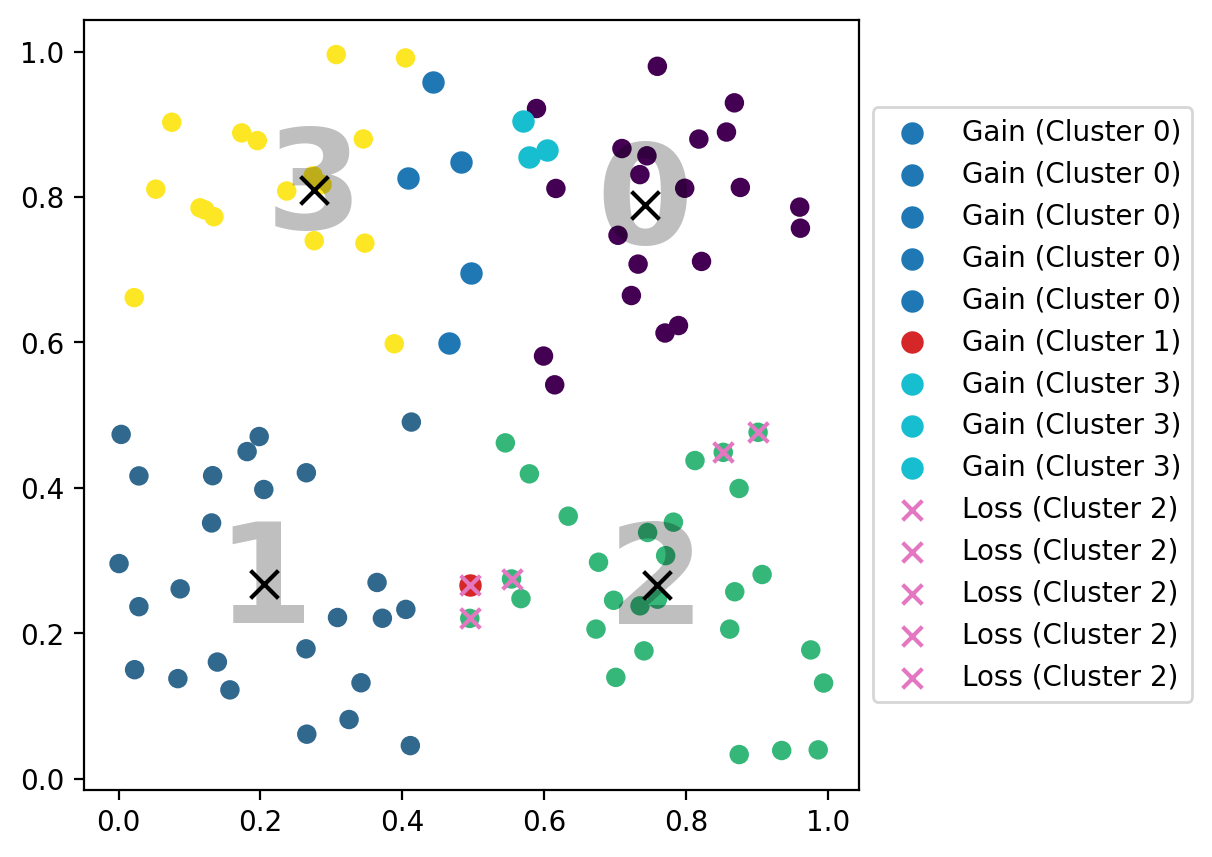

In [23]:
obbk = gs.clustering.OneBoundaryBalancedKMeans(k=n)
obbk.fit(coords, probs)

In [42]:
mem = np.argmax(hard.membership, axis=1)
boarders = np.where(np.count_nonzero(hard.membership, axis=1)>1)[0]
np.round(hard.membership[boarders], 2)

array([[0.78, 0.  , 0.  , 0.22],
       [0.  , 0.85, 0.15, 0.  ],
       [0.  , 0.84, 0.16, 0.  ],
       [0.81, 0.  , 0.  , 0.19],
       [0.  , 0.61, 0.39, 0.  ],
       [0.  , 0.66, 0.34, 0.  ],
       [0.27, 0.  , 0.73, 0.  ],
       [0.52, 0.  , 0.48, 0.  ],
       [0.69, 0.  , 0.  , 0.31]])

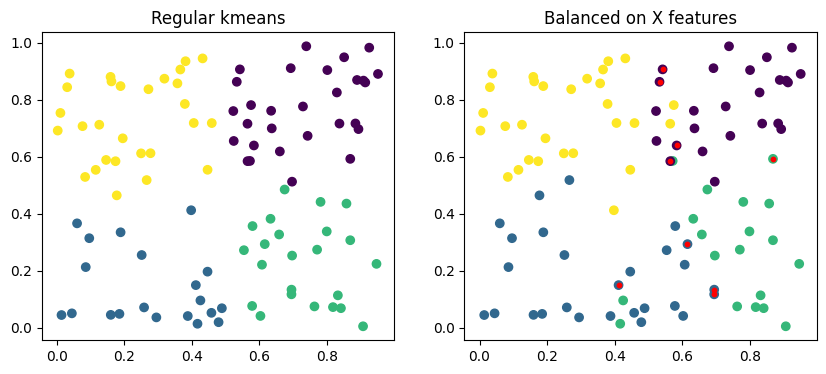

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].scatter(*coords.T, c=hard.labels)
axes[0].title.set_text('Regular kmeans')
axes[1].scatter(*coords.T, c=mem)
axes[1].scatter(*coords[boarders].T, c='red', s=10)
axes[1].title.set_text('Balanced on X features')